<a href="https://colab.research.google.com/github/amarathe/ELEN521_labs/blob/master/Lab8_greyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8
Ashwin Marathe, Sharanjeet Singh

In [20]:
from os import path
import numpy as np

#Instructions for getting dataset from kaggle:
# https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files
!pip install -q kaggle
#Upload your kaggle.json API file

if not path.exists("/root/.kaggle/kaggle.json"): 
  firsttime = True
  uploaded = files.upload()
  !mkdir ~/.kaggle
  !mv kaggle.json ~/.kaggle/kaggle.json
  !ls -halt ~/.kaggle
  !chmod 600 ~/.kaggle/kaggle.json

if firsttime: 
  !kaggle datasets download -d vishalsubbiah/pokemon-images-and-types

import zipfile
if not path.exists("pokemon-images-and-types"):
  with zipfile.ZipFile("pokemon-images-and-types.zip","r") as zip_ref:
    zip_ref.extractall("pokemon-images-and-types")

#!ls

pokemon-images-and-types.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!ls pokemon-images-and-types

import csv
with open('pokemon-images-and-types/pokemon.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)
  pokemons2type = {}

  for row in reader:
    pokemons2type[row['Name']] = row['Type1']
  
types_pokemon = list(set(pokemons2type.values()))
print ("Number of types:", len(types_pokemon))
print ("Types:", ", ".join(types_pokemon))

#Integer to type of pokemon mapping for categorization
int2type = {}
type2int = {}
for i in range(len(types_pokemon)):
  int2type[i] = types_pokemon[i]
  type2int[types_pokemon[i]] = i

import glob
imagepath = 'pokemon-images-and-types/images/images/'
images = glob.glob(imagepath + '*.png')

#from sklearn.datasets import fetch_openml
#imagedata = fetch_openml('Pokemon', data_home=imagepath)
#print ("type imagedata:", type(imagedata))
#print ("imagedata[0]", imagedata[0])

import cv2
import re
import sklearn.model_selection

x_data, y_data = [], []

import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(int2type)

imagesizes = set()
for i, image in enumerate(images):
  im = cv2.imread(image)
#  print ("image:", re.sub(".*\/","", image))
#  print (type(im))
  imagesizes.add(im.shape)
  x_data.append(im)
  name = re.sub(".*\/","", image)
  name = re.sub(".png", "", name)
  y_data.append(type2int[pokemons2type[name]])
  if not i: print ("First pokemon:", image)

#Don't need to categorize as script will do it later
#y_data = tensorflow.keras.utils.to_categorical(y_data)

#Check shape of images
print("imagesizes:", imagesizes)
#Check 1 image to see if it matches label
print ("x_data[0].shape", x_data[0].shape)
print ("y_data[0]:", y_data[0])

#Ran into issues while doing a 200x200x3 image, so use greyscale image
#Reshape into a greyscale image, 28x28
x_data = np.array(x_data)
x_data = np.reshape(x_data[:,:,:,1], (-1,120,120))

import cv2
import numpy as np

newxdata = []
for data in x_data:
  newxdata.append(cv2.resize(data, dsize=(28, 28), interpolation=cv2.INTER_CUBIC))
print ("new x_data shape:", newxdata[0].shape)
x_data=np.array(newxdata)

print ("greyscale x_data:", x_data.shape)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data, y_data)


images	pokemon.csv
Number of types: 18
Types: Water, Fighting, Rock, Dark, Fire, Psychic, Fairy, Ghost, Ice, Steel, Poison, Electric, Flying, Ground, Dragon, Bug, Grass, Normal
{   0: 'Water',
    1: 'Fighting',
    2: 'Rock',
    3: 'Dark',
    4: 'Fire',
    5: 'Psychic',
    6: 'Fairy',
    7: 'Ghost',
    8: 'Ice',
    9: 'Steel',
    10: 'Poison',
    11: 'Electric',
    12: 'Flying',
    13: 'Ground',
    14: 'Dragon',
    15: 'Bug',
    16: 'Grass',
    17: 'Normal'}
First pokemon: pokemon-images-and-types/images/images/starmie.png
imagesizes: {(120, 120, 3)}
x_data[0].shape (120, 120, 3)
y_data[0]: 0
new x_data shape: (28, 28)
greyscale x_data: (721, 28, 28)


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Discriminator model:
Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_56 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_22 (Sequential)      (None, 12544)        387840      input_56[0][0]                   
__________________________________________________________________________________________________
generation (Dense)              (None, 1)            12545       sequential_22[1][0]              
______________________________________________________________________

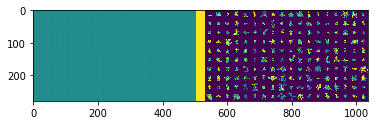

Epoch 2/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

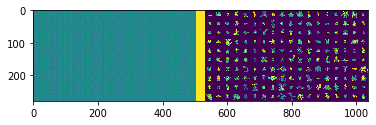

Epoch 3/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

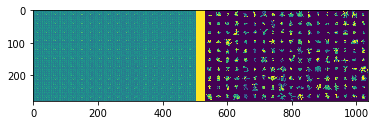

Epoch 4/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

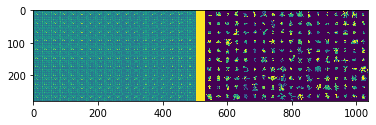

Epoch 5/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

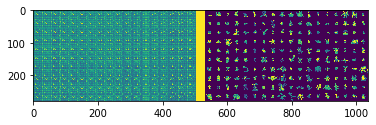

Epoch 6/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

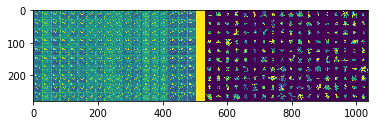

Epoch 7/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

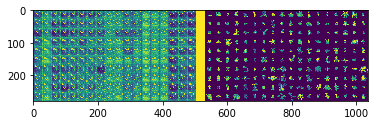

Epoch 8/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

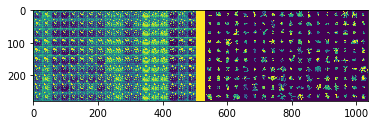

Epoch 9/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated

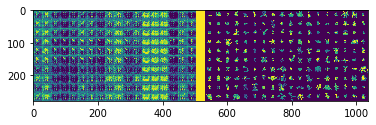

Epoch 10/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

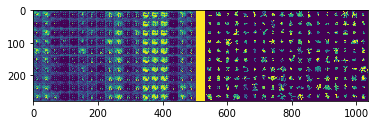

Epoch 11/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

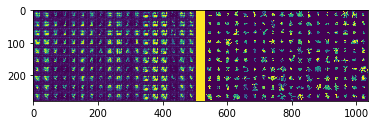

Epoch 12/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

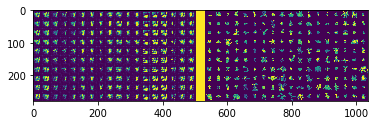

Epoch 13/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

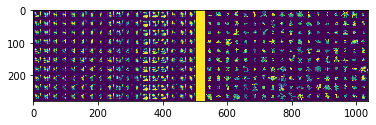

Epoch 14/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

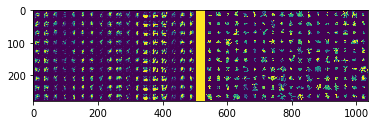

Epoch 15/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 22sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

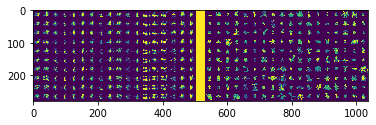

Epoch 16/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

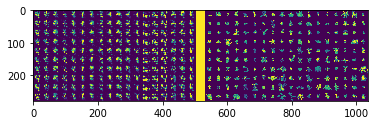

Epoch 17/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

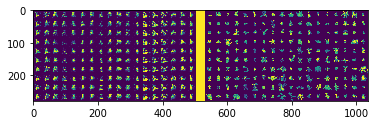

Epoch 18/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 21sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

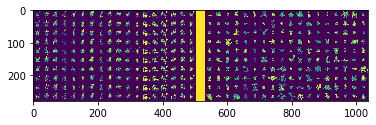

Epoch 19/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

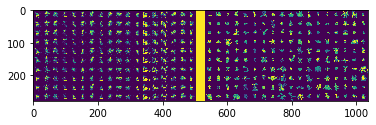

Epoch 20/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

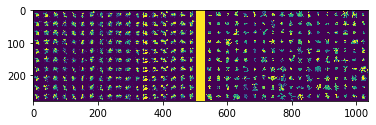

Epoch 21/30
x_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 1/54 [..............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 2/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 3/54 [>.............................] - ETA: 20sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 4/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generated_images.shape (10, 28, 28, 1)
 5/54 [=>............................] - ETA: 19sx_train image_batch shape: (540, 28, 28, 1)
DEBUG image_batch.shape (10, 28, 28, 1)
DEBUG generate

KeyboardInterrupt: ignored

In [28]:
%tensorflow_version 2.0
%matplotlib inline

# 1. Take a look at:
# https://keras.io/examples/mnist_acgan/ (Links to an external site.)
#
# We will use a DCGAN to generate new pokemons or african fabric images
#
# Dataset are in:
#    https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types

from __future__ import print_function

from collections import defaultdict
try:
    import cPickle as pickle
except ImportError:
    import pickle
from PIL import Image

from six.moves import range

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2DTranspose, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Progbar
import numpy as np

np.random.seed(1337)
num_classes = 18


def build_generator(latent_size):
    # we will map a pair of (z, L), where z is a latent vector and L is a
    # label drawn from P_c, to image space (..., 28, 28, 1)
    cnn = Sequential()

    cnn.add(Dense(3 * 3 * 384, input_dim=latent_size, activation='relu'))
    cnn.add(Reshape((3, 3, 384)))

    # upsample to (7, 7, ...)
    cnn.add(Conv2DTranspose(192, 5, strides=1, padding='valid',
                            activation='relu',
                            kernel_initializer='glorot_normal'))
    cnn.add(BatchNormalization())

    # upsample to (14, 14, ...)
    cnn.add(Conv2DTranspose(96, 5, strides=2, padding='same',
                            activation='relu',
                            kernel_initializer='glorot_normal'))
    cnn.add(BatchNormalization())

    # upsample to (28, 28, ...)
    cnn.add(Conv2DTranspose(1, 5, strides=2, padding='same',
                            activation='tanh',
                            kernel_initializer='glorot_normal'))

    # this is the z space commonly referred to in GAN papers
    latent = Input(shape=(latent_size, ))

    # this will be our label
    image_class = Input(shape=(1,), dtype='int32')

    cls = Embedding(num_classes, latent_size,
                    embeddings_initializer='glorot_normal')(image_class)

    # hadamard product between z-space and a class conditional embedding
    h = layers.multiply([latent, cls])

    fake_image = cnn(h)

    return Model([latent, image_class], fake_image)


def build_discriminator():
    # build a relatively standard conv net, with LeakyReLUs as suggested in
    # the reference paper
    cnn = Sequential()

    cnn.add(Conv2D(32, 3, padding='same', strides=2,
                   input_shape=(28, 28, 1)))
    cnn.add(LeakyReLU(0.2))
    cnn.add(Dropout(0.3))

    cnn.add(Conv2D(64, 3, padding='same', strides=1))
    cnn.add(LeakyReLU(0.2))
    cnn.add(Dropout(0.3))

    cnn.add(Conv2D(128, 3, padding='same', strides=2))
    cnn.add(LeakyReLU(0.2))
    cnn.add(Dropout(0.3))

    cnn.add(Conv2D(256, 3, padding='same', strides=1))
    cnn.add(LeakyReLU(0.2))
    cnn.add(Dropout(0.3))

    cnn.add(Flatten())

    image = Input(shape=(28, 28, 1))

    features = cnn(image)

    # first output (name=generation) is whether or not the discriminator
    # thinks the image that is being shown is fake, and the second output
    # (name=auxiliary) is the class that the discriminator thinks the image
    # belongs to.
    fake = Dense(1, activation='sigmoid', name='generation')(features)
    aux = Dense(num_classes, activation='softmax', name='auxiliary')(features)

    return Model(image, [fake, aux])


if __name__ == '__main__':
    # batch and latent size taken from the paper
    epochs = 30
    batch_size = 10
    latent_size = 100

    # Adam parameters suggested in https://arxiv.org/abs/1511.06434
    adam_lr = 0.0002
    adam_beta_1 = 0.5

    # build the discriminator
    print('Discriminator model:')
    discriminator = build_discriminator()
    discriminator.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )
    discriminator.summary()

    # build the generator
    generator = build_generator(latent_size)

    latent = Input(shape=(latent_size, ))
    image_class = Input(shape=(1,), dtype='int32')

    # get a fake image
    fake = generator([latent, image_class])

    # we only want to be able to train generation for the combined model
    discriminator.trainable = False
    fake, aux = discriminator(fake)
    combined = Model([latent, image_class], [fake, aux])

    print('Combined model:')
    combined.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )
    combined.summary()

    # get our mnist data, and force it to be of shape (..., 28, 28, 1) with
    # range [-1, 1]
    #(x_train, y_train), (x_test, y_test) = mnist.load_data()
#    print ("MNIST y_test[0]", y_test[0])
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)
    print ("x_train shape0:", x_train.shape)


    x_test = (x_test.astype(np.float32) - 127.5) / 127.5
    x_test = np.expand_dims(x_test, axis=-1)

    num_train, num_test = x_train.shape[0], x_test.shape[0]

    train_history = defaultdict(list)
    test_history = defaultdict(list)

    for epoch in range(1, epochs + 1):
        print('Epoch {}/{}'.format(epoch, epochs))

        num_batches = int(np.ceil(x_train.shape[0] / float(batch_size)))
        progress_bar = Progbar(target=num_batches)

        epoch_gen_loss = []
        epoch_disc_loss = []

        for index in range(num_batches):
            # get a batch of real images
            print ("x_train image_batch shape:", x_train.shape)
            image_batch = x_train[index * batch_size:(index + 1) * batch_size]
            label_batch = y_train[index * batch_size:(index + 1) * batch_size]

            # generate a new batch of noise
            noise = np.random.uniform(-1, 1, (len(image_batch), latent_size))

            # sample some labels from p_c
            sampled_labels = np.random.randint(0, num_classes, len(image_batch))

            # generate a batch of fake images, using the generated labels as a
            # conditioner. We reshape the sampled labels to be
            # (len(image_batch), 1) so that we can feed them into the embedding
            # layer as a length one sequence
            generated_images = generator.predict(
                [noise, sampled_labels.reshape((-1, 1))], verbose=0)

            print ("DEBUG image_batch.shape", image_batch.shape)
            print ("DEBUG generated_images.shape", generated_images.shape)
            x = np.concatenate((image_batch, generated_images))

            # use one-sided soft real/fake labels
            # Salimans et al., 2016
            # https://arxiv.org/pdf/1606.03498.pdf (Section 3.4)
            soft_zero, soft_one = 0, 0.95
            y = np.array(
                [soft_one] * len(image_batch) + [soft_zero] * len(image_batch))
            aux_y = np.concatenate((label_batch, sampled_labels), axis=0)

            # we don't want the discriminator to also maximize the classification
            # accuracy of the auxiliary classifier on generated images, so we
            # don't train discriminator to produce class labels for generated
            # images (see https://openreview.net/forum?id=rJXTf9Bxg).
            # To preserve sum of sample weights for the auxiliary classifier,
            # we assign sample weight of 2 to the real images.
            disc_sample_weight = [np.ones(2 * len(image_batch)),
                                  np.concatenate((np.ones(len(image_batch)) * 2,
                                                  np.zeros(len(image_batch))))]

            # see if the discriminator can figure itself out...
            epoch_disc_loss.append(discriminator.train_on_batch(
                x, [y, aux_y], sample_weight=disc_sample_weight))

            # make new noise. we generate 2 * batch size here such that we have
            # the generator optimize over an identical number of images as the
            # discriminator
            noise = np.random.uniform(-1, 1, (2 * len(image_batch), latent_size))
            sampled_labels = np.random.randint(0, num_classes, 2 * len(image_batch))

            # we want to train the generator to trick the discriminator
            # For the generator, we want all the {fake, not-fake} labels to say
            # not-fake
            trick = np.ones(2 * len(image_batch)) * soft_one

            epoch_gen_loss.append(combined.train_on_batch(
                [noise, sampled_labels.reshape((-1, 1))],
                [trick, sampled_labels]))

            progress_bar.update(index + 1)

        print('Testing for epoch {}:'.format(epoch))

        # evaluate the testing loss here

        # generate a new batch of noise
        noise = np.random.uniform(-1, 1, (num_test, latent_size))

        # sample some labels from p_c and generate images from them
        sampled_labels = np.random.randint(0, num_classes, num_test)
        generated_images = generator.predict(
            [noise, sampled_labels.reshape((-1, 1))], verbose=False)

        x = np.concatenate((x_test, generated_images))
        y = np.array([1] * num_test + [0] * num_test)
        aux_y = np.concatenate((y_test, sampled_labels), axis=0)

        # see if the discriminator can figure itself out...
        discriminator_test_loss = discriminator.evaluate(
            x, [y, aux_y], verbose=False)

        discriminator_train_loss = np.mean(np.array(epoch_disc_loss), axis=0)

        # make new noise
        noise = np.random.uniform(-1, 1, (2 * num_test, latent_size))
        sampled_labels = np.random.randint(0, num_classes, 2 * num_test)

        trick = np.ones(2 * num_test)

        generator_test_loss = combined.evaluate(
            [noise, sampled_labels.reshape((-1, 1))],
            [trick, sampled_labels], verbose=False)

        generator_train_loss = np.mean(np.array(epoch_gen_loss), axis=0)

        # generate an epoch report on performance
        train_history['generator'].append(generator_train_loss)
        train_history['discriminator'].append(discriminator_train_loss)

        test_history['generator'].append(generator_test_loss)
        test_history['discriminator'].append(discriminator_test_loss)

        print('{0:<22s} | {1:4s} | {2:15s} | {3:5s}'.format(
            'component', *discriminator.metrics_names))
        print('-' * 65)

        ROW_FMT = '{0:<22s} | {1:<4.2f} | {2:<15.4f} | {3:<5.4f}'
        print(ROW_FMT.format('generator (train)',
                             *train_history['generator'][-1]))
        print(ROW_FMT.format('generator (test)',
                             *test_history['generator'][-1]))
        print(ROW_FMT.format('discriminator (train)',
                             *train_history['discriminator'][-1]))
        print(ROW_FMT.format('discriminator (test)',
                             *test_history['discriminator'][-1]))

        # save weights every epoch
        generator.save_weights(
            'params_generator_epoch_{0:03d}.hdf5'.format(epoch), True)
        discriminator.save_weights(
            'params_discriminator_epoch_{0:03d}.hdf5'.format(epoch), True)

        # generate some digits to display
        #num_rows = 40
        num_rows = 10
        noise = np.tile(np.random.uniform(-1, 1, (num_rows, latent_size)),
                        (num_classes, 1))

        sampled_labels = np.array([
            [i] * num_rows for i in range(num_classes)
        ]).reshape(-1, 1)

        # get a batch to display
        generated_images = generator.predict(
            [noise, sampled_labels], verbose=0)

        # prepare real images sorted by class label
        real_labels = y_train[0 * num_rows * num_classes:
                              1 * num_rows * num_classes]
        indices = np.argsort(real_labels, axis=0)
        #real_images = x_train[(epoch - 1) * num_rows * num_classes:
        #                      epoch * num_rows * num_classes][indices]
        print ("x_train real_images shape:", x_train.shape)
        real_images = x_train[0 * num_rows * num_classes:
                              1 * num_rows * num_classes][indices]

        # display generated images, white separator, real images
        print ("Generated_images shape:", generated_images.shape)
        print ("x_train.shape", x_train.shape)
        print ("np.repeat(np.ones_like(x_train[:1]), num_rows, axis=0).shape",
               np.repeat(np.ones_like(x_train[:1]), num_rows, axis=0).shape)
        print ("real_images:", real_images.shape)

        img = np.concatenate(
            (generated_images,
             np.repeat(np.ones_like(x_train[:1]), num_rows, axis=0),
             real_images))

        # arrange them into a grid
        print ("img shape:", img.shape)

        img = (np.concatenate([r.reshape(-1, 28)
                               for r in np.split(img, 2 * num_classes + 1)
                               ], axis=-1) * 127.5 + 127.5).astype(np.uint8)

        from matplotlib import pyplot as plt
        plt.imshow(img, interpolation='nearest')
        plt.show() 

        Image.fromarray(img).save(
            'plot_epoch_{0:03d}_generated.png'.format(epoch))

    with open('acgan-history.pkl', 'wb') as f:
        pickle.dump({'train': train_history, 'test': test_history}, f)

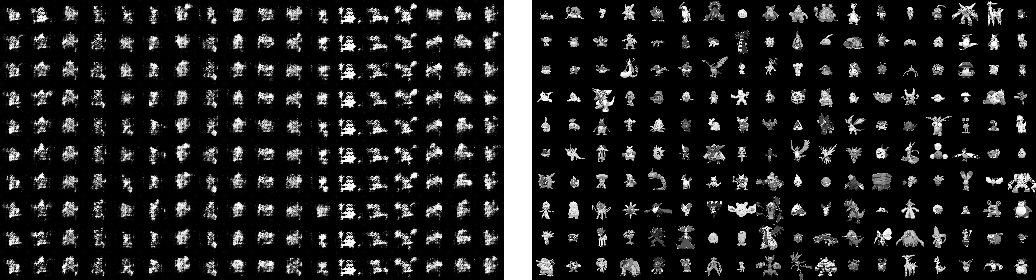

In [30]:
#!ls *.png
from IPython.display import Image
Image(filename='plot_epoch_020_generated.png') 
#Generated images in greyscale; next step is to add RGB to model and increase number of pixels